In [1]:
import torch

In [2]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


Error processing line 1 of C:\Users\Uttam\anaconda3\envs\envpytorch\lib\site-packages\vision-1.0.0-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\Uttam\anaconda3\envs\envpytorch\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [3]:
from torchvision import transforms, datasets

In [4]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [5]:
test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [6]:
train

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: 
    Transforms (if any): Compose(
                             ToTensor()
                         )
    Target Transforms (if any): None

In [7]:
#iterating over the dataset 
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

In [8]:
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [9]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x, y = data[0][0],data[1][0]

In [11]:
print(y)

tensor(7)


In [12]:
data[0][0].shape

torch.Size([1, 28, 28])

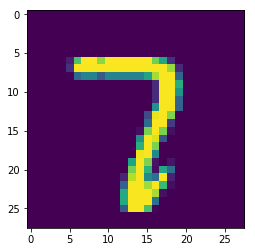

In [13]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))

In [14]:
# checking label for output , output is balanced or not 
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [15]:
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

In [16]:
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [17]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


In [6]:
import torch.nn as nn #torch.nn gives access to neural network things like  layers
import torch.nn.functional as F # give access to function like relu

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) # finally layer we will use softmax 

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [20]:
#activation functions are keeping our data scaled between 0 and 1.
# just an example.
t1= torch.rand((28,28))
t1= t1.view(-1,28*28)
output = net(t1)
output

tensor([[-2.2667, -2.2828, -2.4511, -2.2084, -2.2470, -2.2474, -2.4460, -2.1914,
         -2.4084, -2.3175]], grad_fn=<LogSoftmaxBackward>)

In [21]:
import torch.optim as optim
# loss function and optimiser
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [22]:
torch.cuda.current_device()

0

In [23]:
torch.cuda.get_device_name(0)

'GeForce GTX 1650'

In [24]:
torch.cuda.set_device(0)# setting gpu

In [25]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.0279, grad_fn=<NllLossBackward>)
tensor(0.0191, grad_fn=<NllLossBackward>)
tensor(0.2043, grad_fn=<NllLossBackward>)


In [26]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1


In [27]:
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.966


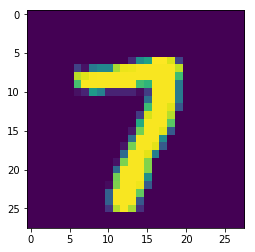

In [28]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [29]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7)


In [30]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor([-2.3555e+01, -1.0113e+01, -9.6664e+00, -1.0477e+01, -1.9269e+01,
        -1.6346e+01, -3.1398e+01, -1.3327e-04, -1.3836e+01, -1.5979e+01],
       grad_fn=<SelectBackward>)
tensor(7)


In [2]:
import torch
MODEL1  = 'dig_recogniser_param.pt' # save only with parameter 
MODEL2= 'dig_recogniser.pt' # save with entire net
print(f"{MODEL1} has saved successfully")
torch.save(net.state_dict(), MODEL1)
torch.save(net, MODEL2)

dig_recogniser_param.pt has saved successfully


NameError: name 'net' is not defined

In [8]:
import torch
MODEL = 'dig_recogniser.pt'


model = torch.load(MODEL)
print('model loaded successfully')

model loaded successfully


In [9]:
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [10]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 1023-C329

 Directory of C:\Users\Uttam\Desktop\Ds\pytorch

04-08-2020  01:00    <DIR>          .
04-08-2020  01:00    <DIR>          ..
03-08-2020  01:25    <DIR>          .ipynb_checkpoints
28-07-2020  19:01             6,745 dia.pt
28-07-2020  18:12            23,873 diabetes.csv
28-07-2020  19:07           773,534 diabetes.ipynb
03-08-2020  17:35           241,316 dig_recogniser.pt
03-08-2020  17:35           238,092 dig_recogniser_param.pt
01-08-2020  20:19            60,933 HousePrice.pt
01-08-2020  20:19            35,064 HouseWeights.pt
03-08-2020  15:32             4,856 img.jpg
01-08-2020  20:24           119,039 kn_T5_House_price_prediction.ipynb
02-08-2020  13:31    <DIR>          MNIST
27-07-2020  19:12               305 pytorch_env.yml
04-08-2020  01:00            31,941 sd_mnist .ipynb
28-07-2020  19:45            18,098 torch_basic.ipynb
              12 File(s)      1,553,796 bytes
               4 Dir(s)  89,777,987,

In [11]:
file_path = 'img.jpg'

In [12]:
def image_loader(loader, image_name):
    image = Image.open(image_name)
    image = loader(image).float()
    image = torch.tensor(image, requires_grad=True)
    image = image.unsqueeze(0)
    return image